In [15]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('seaborn')

# Import __[Global Ecological Footprint 2016](https://www.kaggle.com/footprintnetwork/ecological-footprint)__ dataset

In [16]:
ecological = pd.read_csv("./Data/countries.csv")
ecological

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Vietnam,Asia-Pacific,90.80,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,...,0.55,0.01,0.17,0.16,0.10,1.00,-0.65,0.95,1.66,6
184,Wallis and Futuna Islands,Asia-Pacific,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.51,-0.56,1.19,1.37,3T
185,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,...,0.09,0.12,0.04,0.20,0.04,0.50,-0.53,0.59,2.06,5
186,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


# Import __[World Happiness Report 2016](https://www.kaggle.com/unsdsn/world-happiness)__ dataset

In [17]:
happiness = pd.read_csv("./Data/2016.csv")
happiness

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


# Remove countries that aren't on both datasets

Note that I had to name Vietnam to be the same in the csv files

In [18]:
data = reduce(lambda left, right: pd.merge(left, right, on='Country'), [ecological, happiness])
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uzbekistan,Middle East/Central Asia,28.54,0.67,"$1,560.85",0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
129,Vietnam,Asia-Pacific,90.80,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
130,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
131,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


# Remove countries with NaNs as any element

In [19]:
print(data.isnull().values.any()) # Check if any contain NaNs
data[data.isna().any(axis=1)] # Display which ones contain NaN

True


,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
22,Cambodia,Asia-Pacific,14.86,0.55,$877.64,NaN,NaN,NaN,NaN,NaN,...,3.907,3.798,4.016,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339,1.31573
39,Estonia,European Union,1.29,0.85,"$17,304.40",NaN,NaN,NaN,NaN,NaN,...,5.517,5.437,5.597,1.27964,1.05163,0.68098,0.41511,0.18519,0.08423,1.81985
41,Finland,European Union,5.41,0.88,"$50,960.20",NaN,NaN,NaN,NaN,NaN,...,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
90,Norway,Northern/Eastern Europe,4.99,0.94,"$100,172.00",NaN,NaN,NaN,NaN,NaN,...,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
108,Somalia,Africa,10.20,NaN,NaN,0.16,0.43,0.52,0.07,0.01,...,5.440,5.321,5.559,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772


In [20]:
data = data.dropna(how='any')
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uzbekistan,Middle East/Central Asia,28.54,0.67,"$1,560.85",0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
129,Vietnam,Asia-Pacific,90.80,0.66,"$1,532.31",0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
130,Yemen,Middle East/Central Asia,23.85,0.50,"$1,302.30",0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
131,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


# Output CSV

In [21]:
data['GDP per Capita'] = data['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)
data

data.to_csv('./Data/data.csv', index = False)

# Import CSV


In [22]:
data = pd.read_csv("./Data/data.csv")
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
124,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
125,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
126,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


In [23]:
data['GDP per Capita'] = data['GDP per Capita'].replace('[\$,]', '', regex=True).astype(float)
data

,Country,Region_x,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,...,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
2,Algeria,Africa,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
3,Angola,Africa,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
4,Argentina,Latin America,41.09,0.83,13540.00,0.78,0.79,0.29,1.08,0.10,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,Middle East/Central Asia,28.54,0.67,1560.85,0.62,0.13,0.08,1.41,0.00,...,5.987,5.896,6.078,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
124,Vietnam,Asia-Pacific,90.80,0.66,1532.31,0.50,0.01,0.19,0.79,0.05,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
125,Yemen,Middle East/Central Asia,23.85,0.50,1302.30,0.34,0.14,0.04,0.42,0.04,...,3.724,3.621,3.827,0.57939,0.47493,0.31048,0.22870,0.05892,0.09821,1.97295
126,Zambia,Africa,14.08,0.58,1740.64,0.19,0.18,0.33,0.24,0.01,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


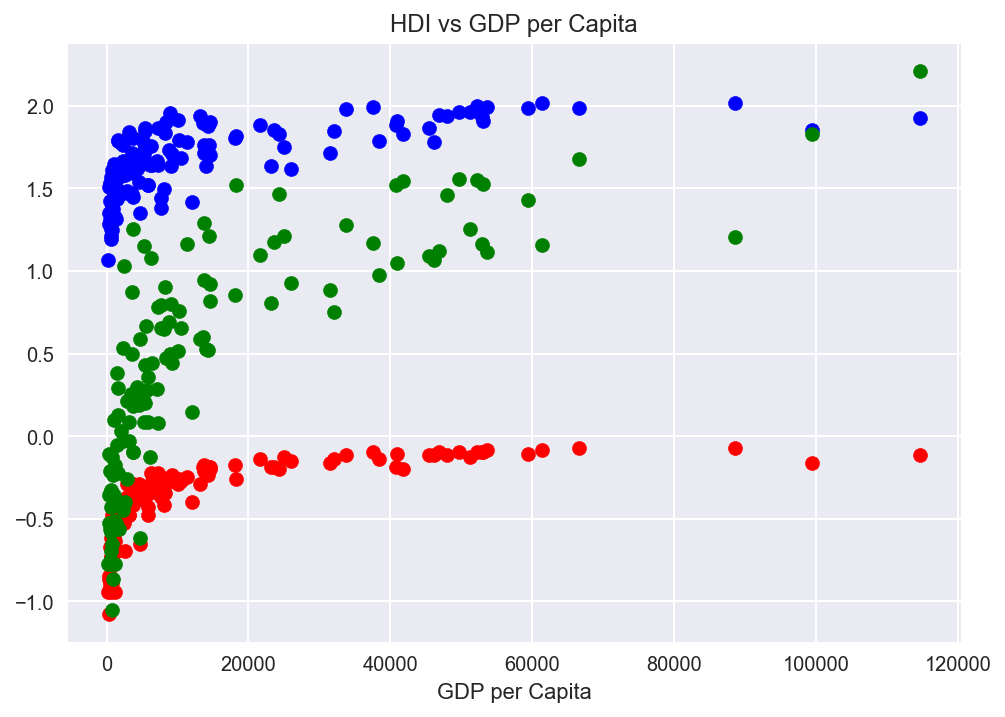

In [24]:
plt.style.use('seaborn')

plt.figure()
plt.scatter(data['GDP per Capita'], np.log(data['HDI']), marker='o', color='r')
plt.scatter(data['GDP per Capita'], np.log(data['Happiness Score']), marker='o', color='b')
plt.scatter(data['GDP per Capita'], np.log(data['Earths Required']), marker='o', color='g')

plt.title('HDI vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.show()

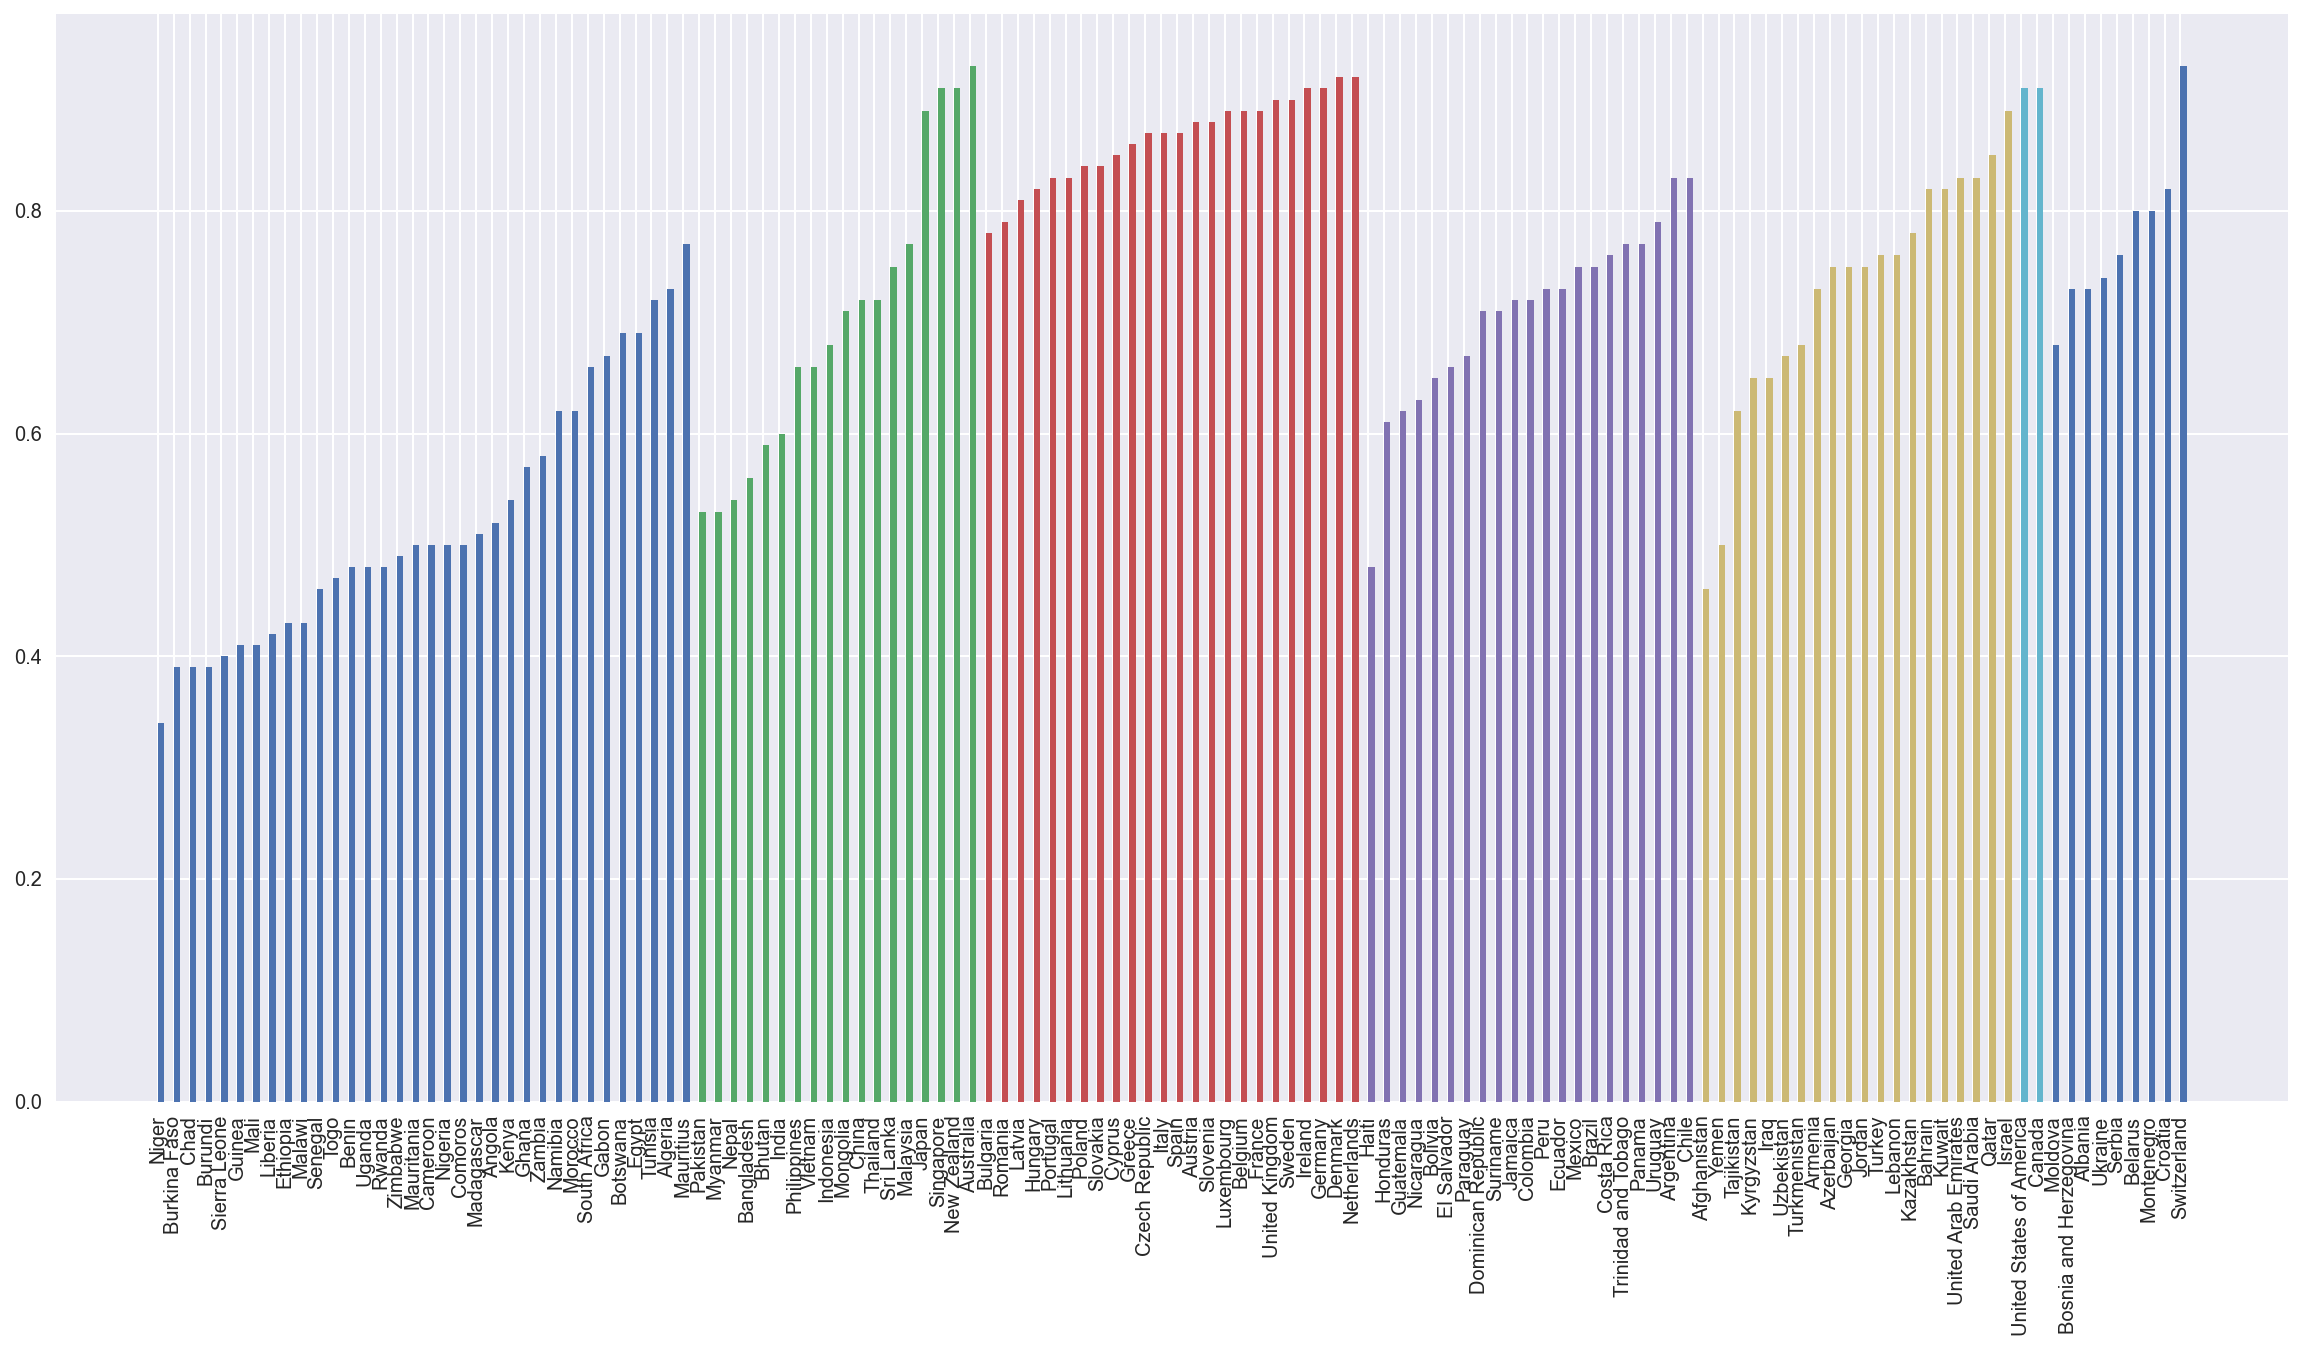

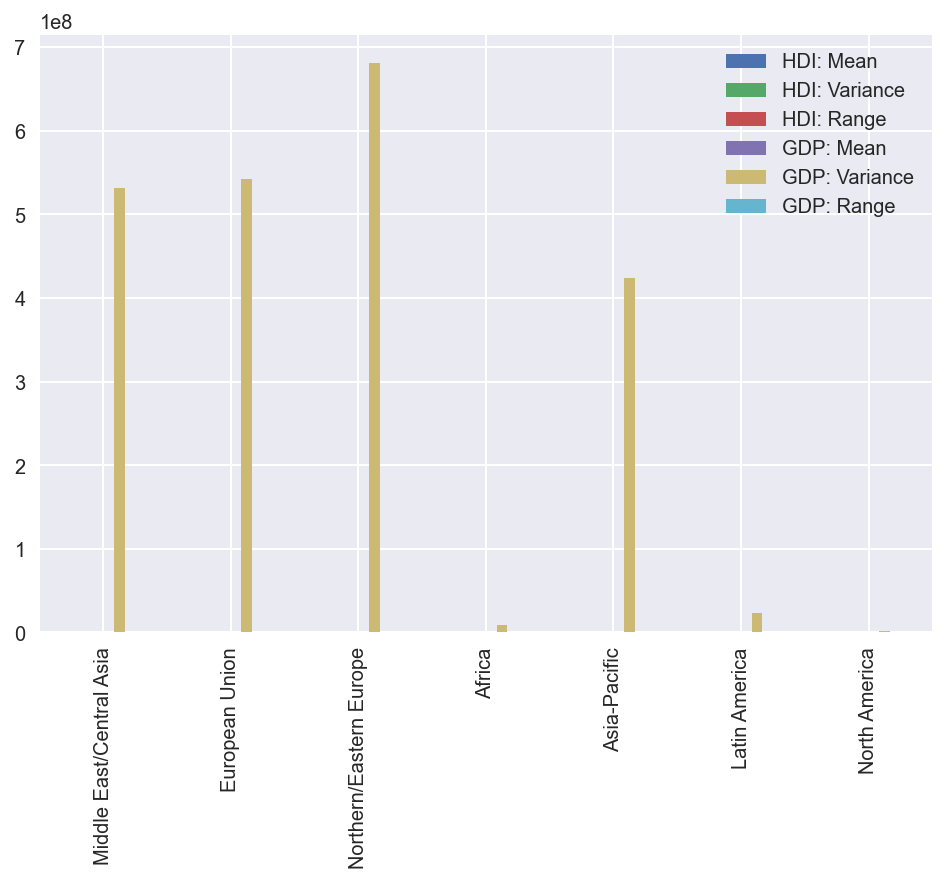

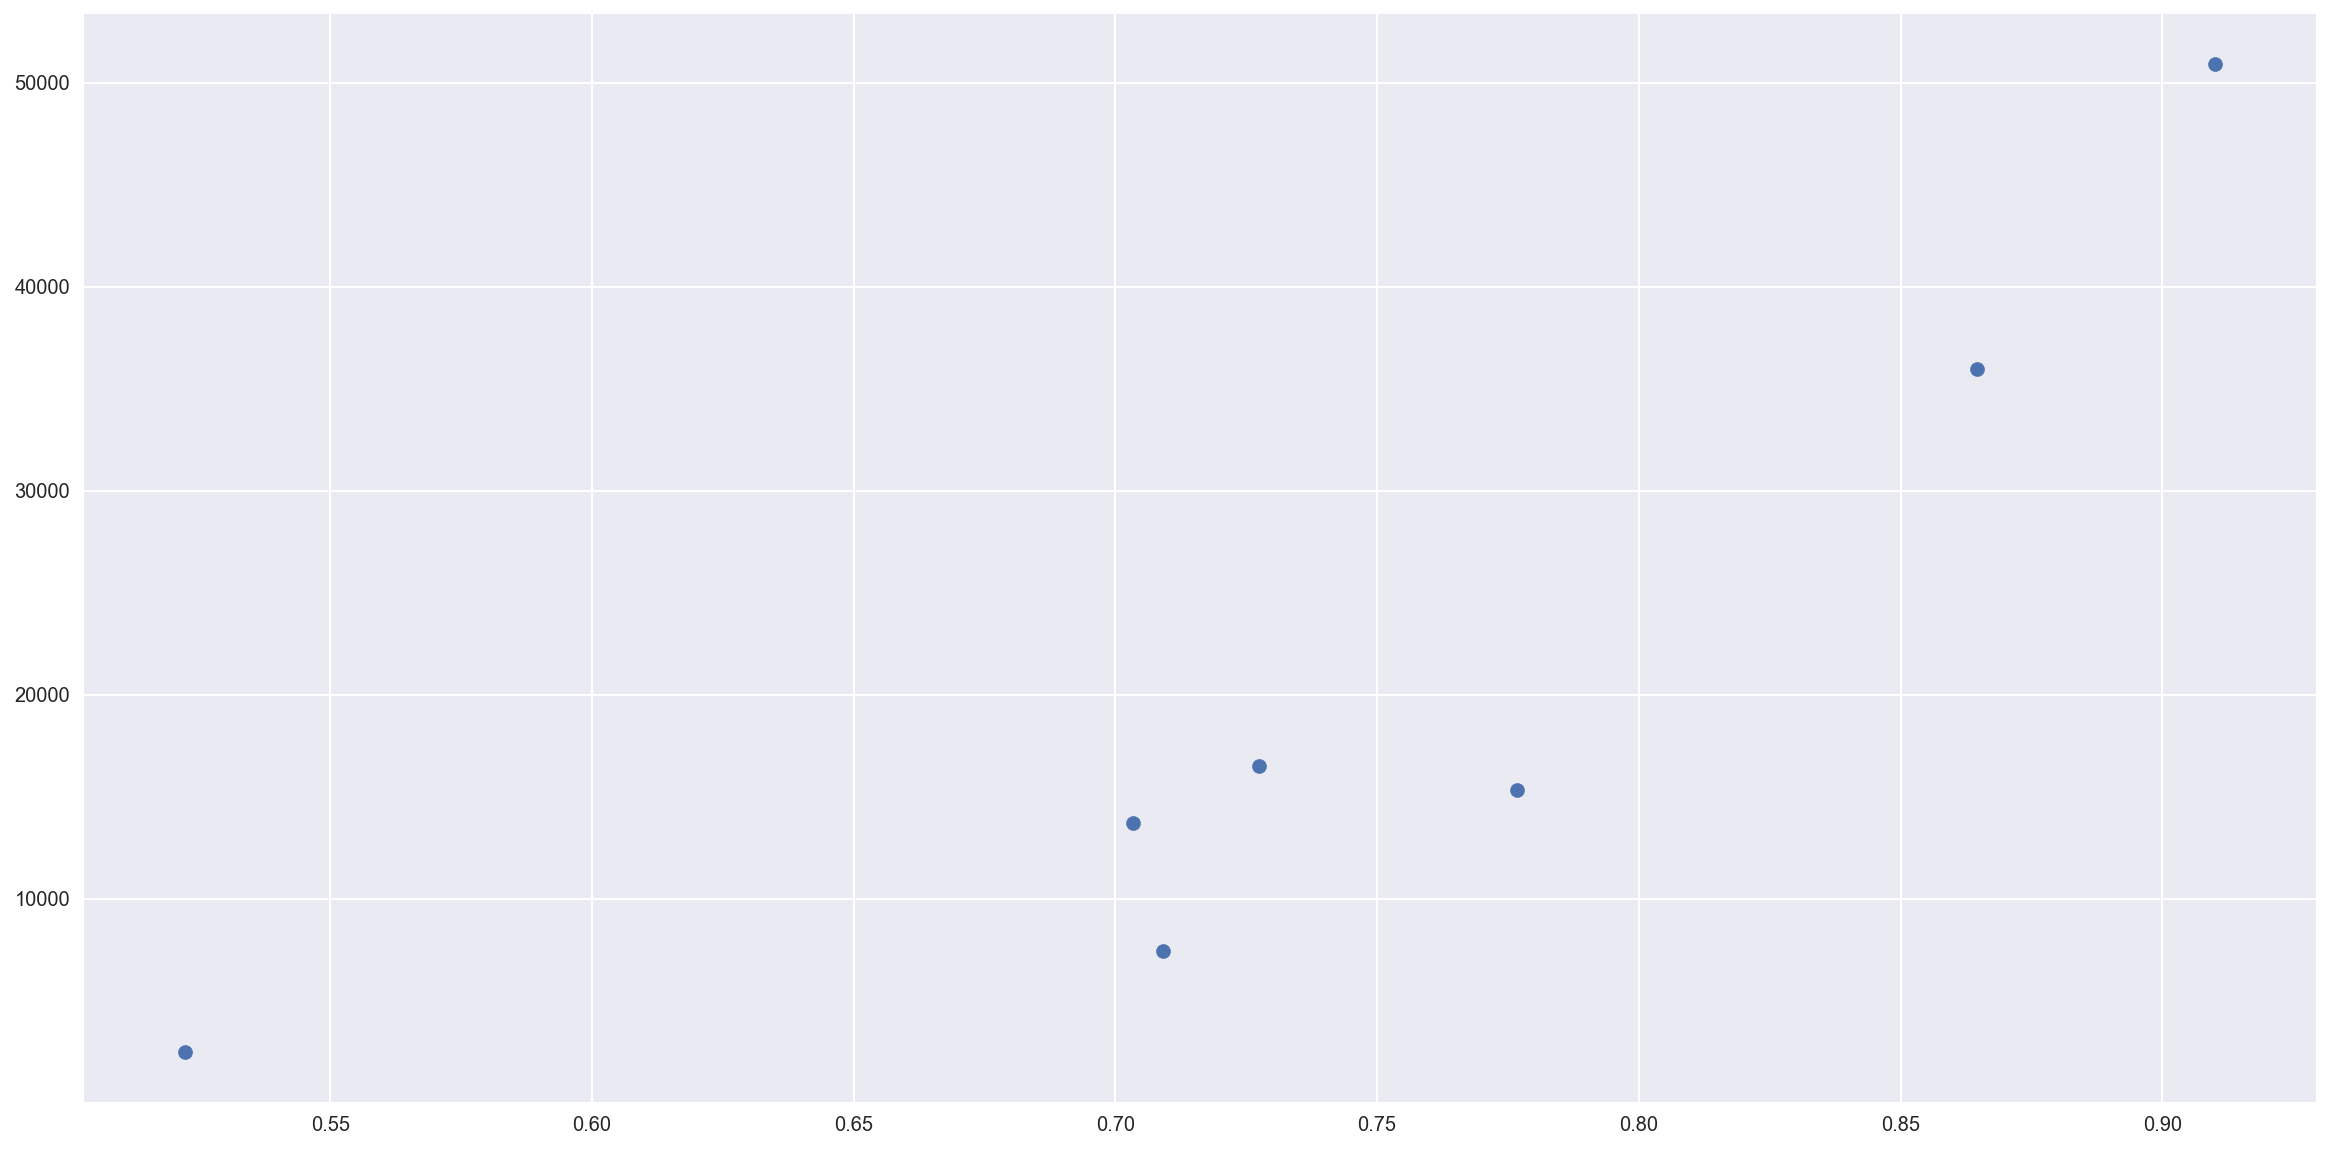

In [25]:
data = data.sort_values('HDI')

plt.figure(figsize=(20, 10))
region_data = {k : [] for k in set(data['Region_x'])}

for k, d in data.groupby('Region_x'):
    region_data[k].append(np.mean(d.HDI))
    region_data[k].append(np.var(d.HDI))
    region_data[k].append(np.max(d.HDI) - np.min(d.HDI))

    region_data[k].append(np.mean(d['GDP per Capita']))
    region_data[k].append(np.var(d['GDP per Capita']))
    region_data[k].append(np.max(d['GDP per Capita']) - np.min(d['GDP per Capita']))
    
    plt.bar(d.Country, d.HDI, width=.4, align='edge')
    plt.xticks(rotation=90)
plt.show()

df = pd.DataFrame(region_data)
df.index = ['HDI: Mean', 'HDI: Variance', 'HDI: Range', 'GDP: Mean','GDP: Variance', 'GDP: Range']
df.T.plot.bar()

plt.figure(figsize=(20, 10))
plt.scatter(df.T['HDI: Mean'], df.T['GDP: Mean'])

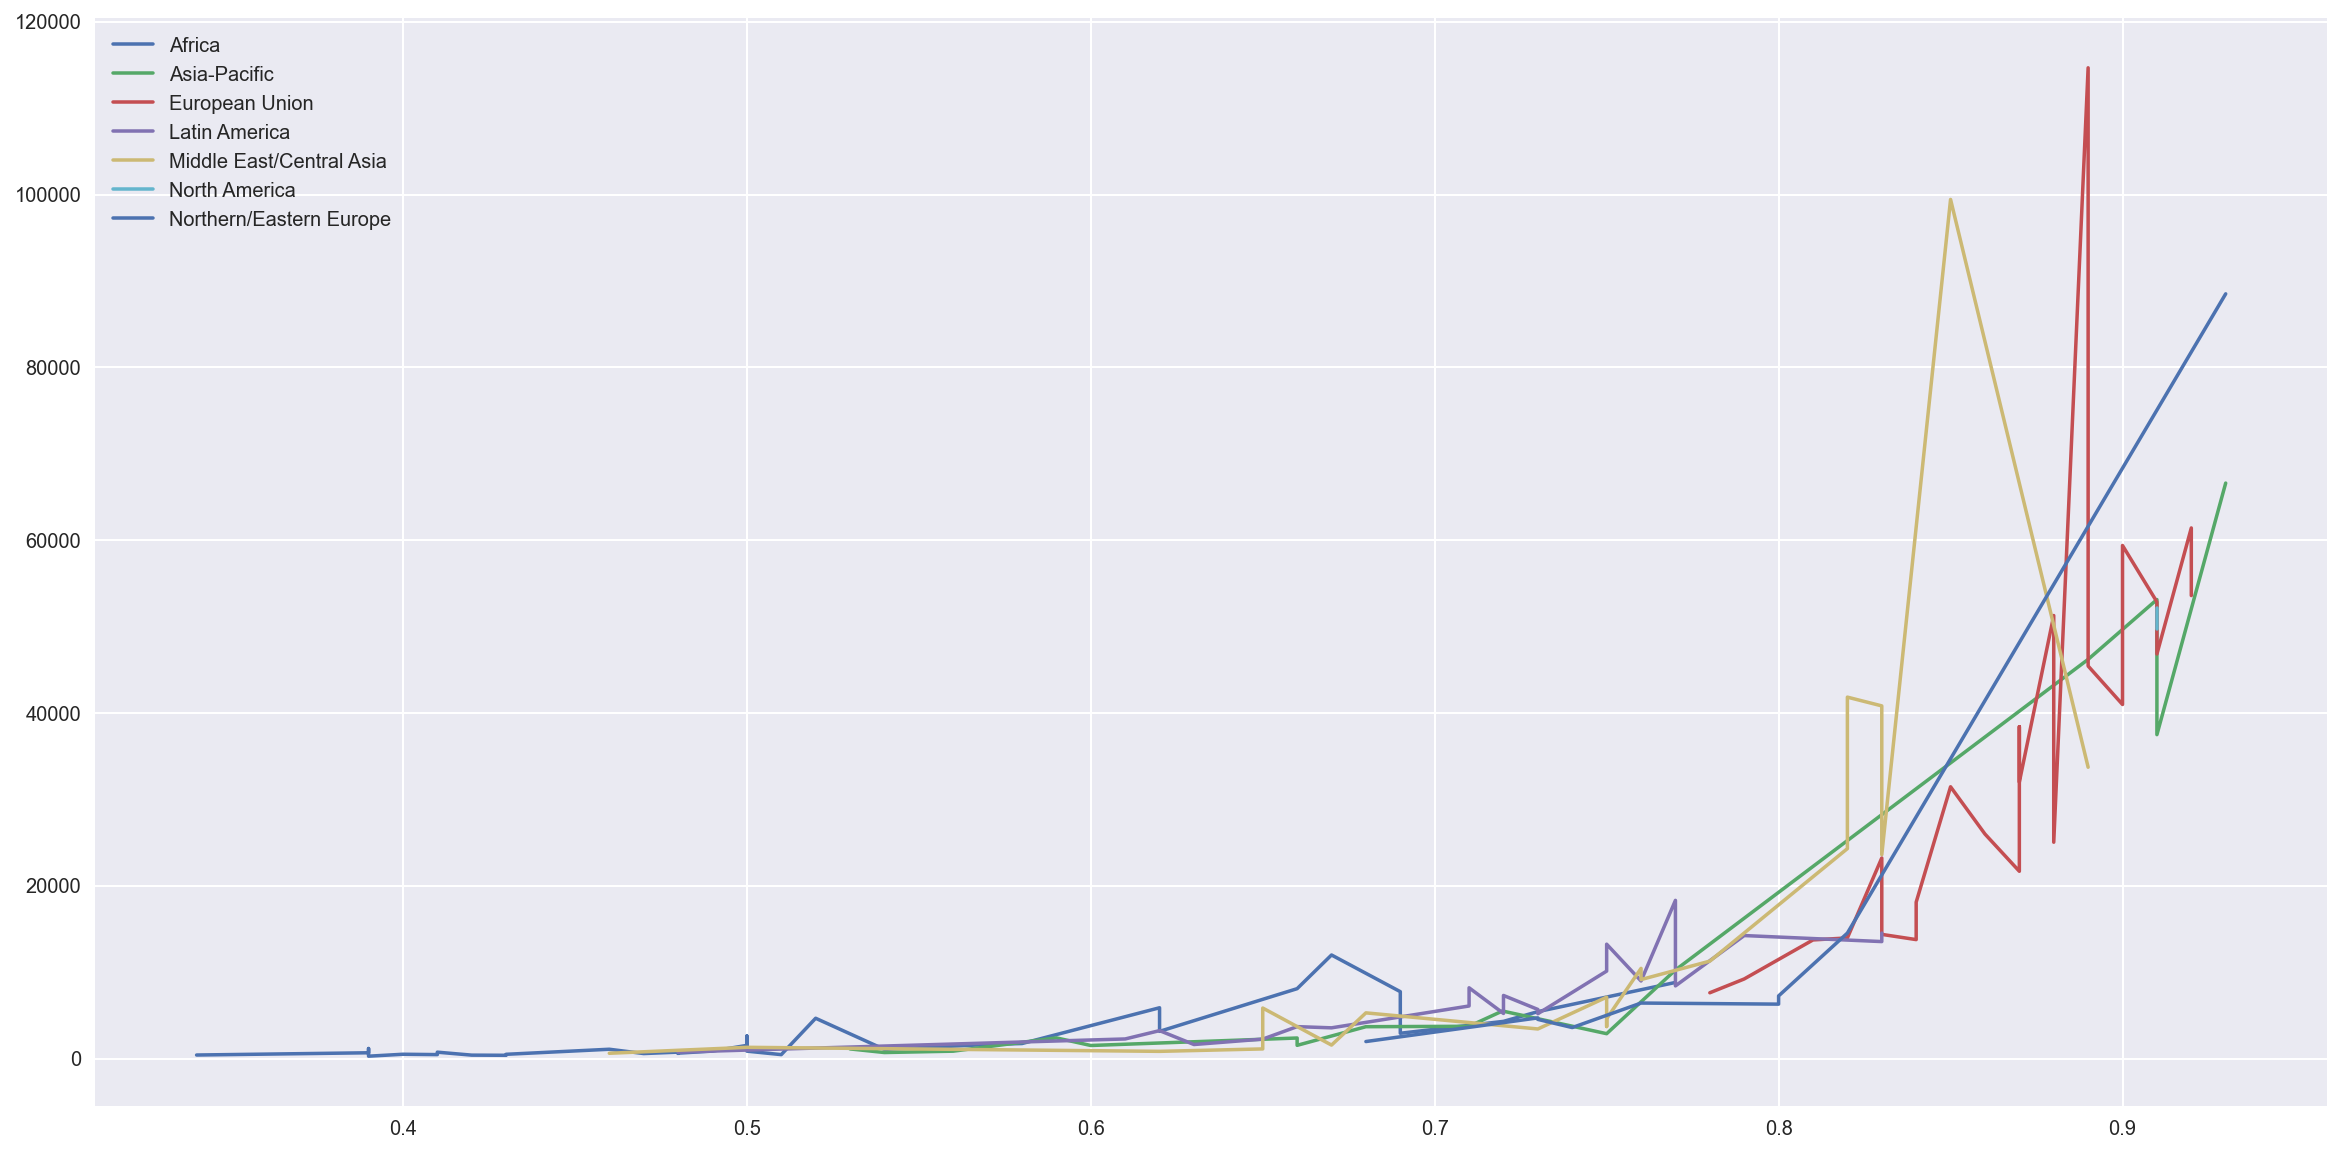

In [26]:
#plt.figure(figsize=(20, 10))
plt.figure(figsize=(20, 10))
labels = []
for k, d in data.groupby('Region_x'):
    labels.append(str(k))
    plt.plot(d.HDI, d['GDP per Capita'])
plt.legend(labels)
plt.show()
